In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

df = pd.read_csv("shopping_trends.csv")

print(df.head())

   Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse  Clothing                     53   
1            2   19   Male        Sweater  Clothing                     64   
2            3   50   Male          Jeans  Clothing                     73   
3            4   21   Male        Sandals  Footwear                     90   
4            5   45   Male         Blouse  Clothing                     49   

        Location Size      Color  Season  Review Rating Subscription Status  \
0       Kentucky    L       Gray  Winter            3.1                 Yes   
1          Maine    L     Maroon  Winter            3.1                 Yes   
2  Massachusetts    S     Maroon  Spring            3.1                 Yes   
3   Rhode Island    M     Maroon  Spring            3.5                 Yes   
4         Oregon    M  Turquoise  Spring            2.7                 Yes   

  Payment Method  Shipping Type Discount Applied Promo C

In [7]:
#Кількість рядків
num_rows, num_columns = df.shape

print("Кількість рядків і стовпчиків:", num_rows, num_columns)

Кількість рядків і стовпчиків: 3900 19


In [10]:
#Тип стовпців
print("Тип стовпців:")
print(df.dtypes)

#Пропусків
print("\nПропусків:")
print(df.isnull().sum())


Тип стовпців:
Customer ID                   int64
Age                           int64
Gender                       object
Item Purchased               object
Category                     object
Purchase Amount (USD)         int64
Location                     object
Size                         object
Color                        object
Season                       object
Review Rating               float64
Subscription Status          object
Payment Method               object
Shipping Type                object
Discount Applied             object
Promo Code Used              object
Previous Purchases            int64
Preferred Payment Method     object
Frequency of Purchases       object
dtype: object

Пропусків:
Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season

In [11]:
numerical_features = df[["Age", "Purchase Amount (USD)", "Review Rating", "Previous Purchases"]]

scaler = StandardScaler()
scaled_data = StandardScaler().fit_transform(numerical_features)

print(scaled_data)




[[ 0.71891344 -0.28562864 -0.90758357 -0.78583067]
 [-1.64862924  0.17885219 -0.90758357 -1.61655226]
 [ 0.39008807  0.55888195 -0.90758357 -0.16278948]
 ...
 [ 0.12702777 -1.13013923 -1.18686209 -0.09356268]
 [-0.00450238  0.72778407  0.06989124 -0.09356268]
 [ 0.52161822  0.89668619 -0.90758357  0.52947851]]


In [14]:
#Оптимальна кількість кластерів
wcs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_data)
    wcs.append(kmeans.inertia_)

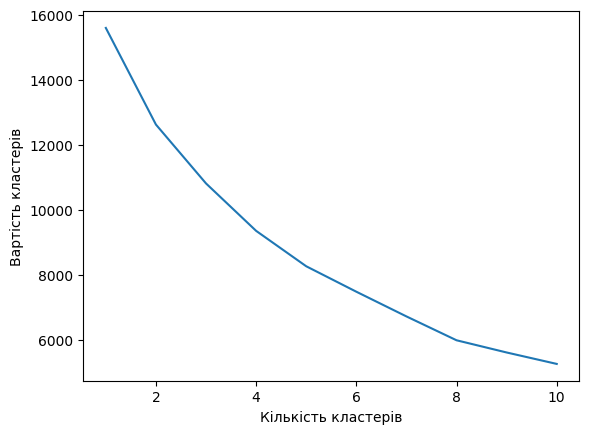

In [15]:
#Графік ліктя
plt.plot(range(1, 11), wcs)
plt.xlabel("Кількість кластерів")
plt.ylabel("Вартість кластерів")
optimal_clusters = 3
plt.show()


kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
df['Cluster'] = kmeans.fit_predict(scaled_data)

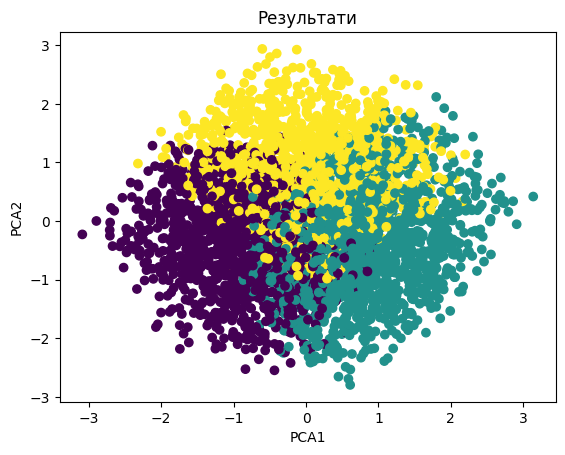

In [16]:
#Візуалізація даних
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)
df['PCA1'] = reduced_data[:, 0]
df['PCA2'] = reduced_data[:, 1]

plt.scatter(df['PCA1'], df['PCA2'], c=df['Cluster'])
plt.title('Результати')
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.show()

Висновок: на лабораторній роботі було проведено аналіз і кластеризацію даних з використанням методу K-середніх і методу PCA. Було використано різні бібліотеки  numpy, matplotlib, pandas, scikit-learn